# `merge_too_small`

As we've seen, there are several algorithms which leave "stranded", isolated pixels ungrouped, or grouped at the end into small, irrelevant groups.

The `merge_too_small` script reassigns those groups to a neighboring group.  Technically this violates the rules used 
to establish the groups, which is why it is a separate script and step in the processing.

"too_small" is defined as either

- `method=area` the number of pixels in the group is below `minvalue`
- `method=counts` the number of counts in the `imgfile` in the group is less than `minvalue`.

`merge_too_small` always reassigns to the adjoining group with the most counts or largest area.


In [1]:
ciaover 
echo Today is `date`

CIAO 4.11 Wednesday, December  5, 2018
  bindir      : /export/ciao-4.11/bin
  CALDB       : 4.8.2
Today is Wed Jan 23 08:34:27 EST 2019


In [2]:
source display_map.sh

In [3]:
#/bin/rm -rf ./tmp
#mkdir ./tmp
ASCDS_WORK_PATH=`pwd`/tmp

## Example: area too small

We saw in the `pathfinder` example a situation where the grouped contained very few pixels.

We'll use the `merge_too_small` script to merge those smaller contours onto the largest adjoining group.


In [4]:
# To keep notebook short, some verbose output has been remove
merge_too_small pathfinder.map pathfinder_min20px.map \
  method=area minval=20  clob+ verb=1 mode=h | \
  egrep -v 'Working on mask_id'


merge_too_small
          infile = pathfinder.map
         outfile = pathfinder_min20px.map
          method = area
         imgfile = 
          binimg = 
        minvalue = 20
         verbose = 1
         clobber = yes
            mode = h



In [5]:
dmimgcalc pathfinder_min20px.map pathfinder.map pathfinder.diff.map sub clob+

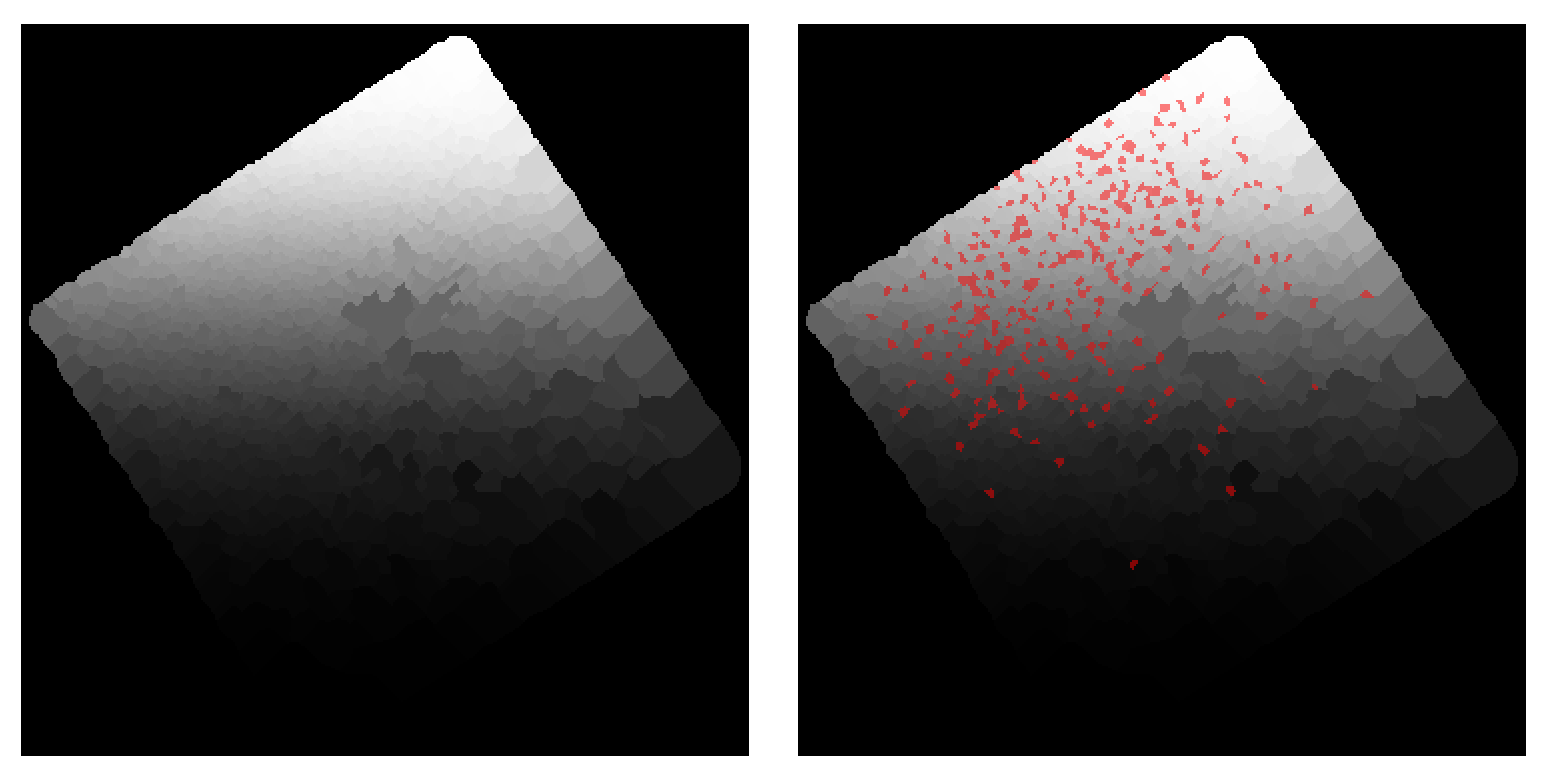

In [6]:
ds9 -geom 1550x824 -zoom 2 \
  -view info no -view panner no -view magnifier no -view buttons no -view colorbar no \
  pathfinder.map pathfinder_min20px.map  \
  -tile yes \
  -mask transparency 50 -mask color red \
  -mask pathfinder.diff.map \
  -saveimage png p_small_area.png -exit

display < p_small_area.png

Left is the original output from `pathfinder`, Right is after adjusting the grouping to have a min of 20 pixels in each group.  The diff is shaded in red.

## Example 2 : min counts

In [7]:
merge_too_small pathfinder_min20px.map pathfinder_min20px_min300cts.map \
  method=counts imgfile=img.fits binimg=pathfinder_min20px_min300cts.img minval=300 verb=1 clob+ | \
  egrep -v 'Working on mask_id'


merge_too_small
          infile = pathfinder_min20px.map
         outfile = pathfinder_min20px_min300cts.map
          method = counts
         imgfile = img.fits
          binimg = pathfinder_min20px_min300cts.img
        minvalue = 300
         verbose = 1
         clobber = yes
            mode = ql



In [8]:
dmimgcalc pathfinder_min20px.map pathfinder_min20px_min300cts.map pathfinder.diff2.map sub clob+

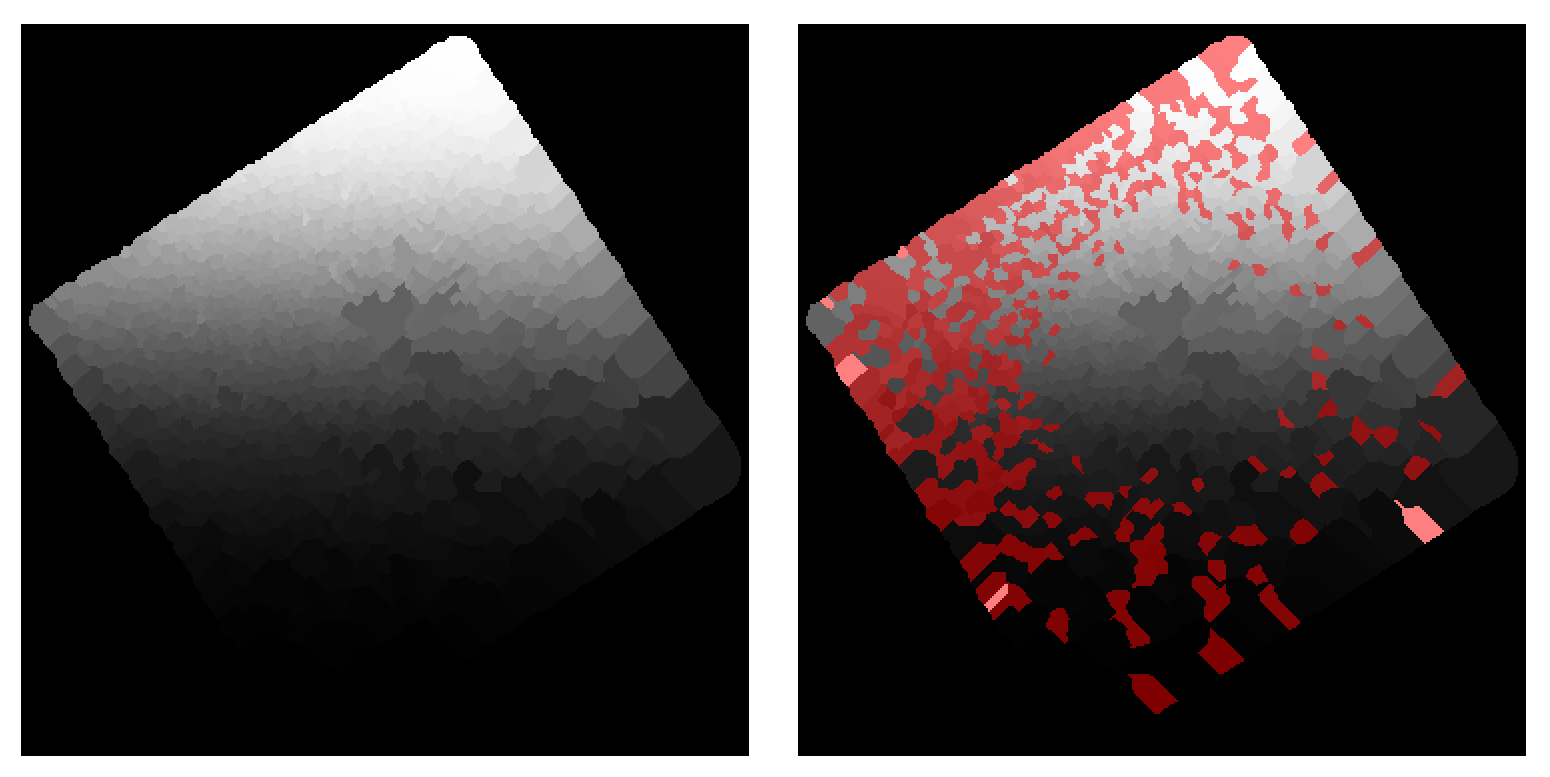

In [9]:
ds9 -geom 1550x824 -zoom 2 \
  -view info no -view panner no -view magnifier no -view buttons no -view colorbar no \
  pathfinder_min20px.map  pathfinder_min20px_min300cts.map \
  -tile yes \
  -mask transparency 50 -mask color red \
  -mask pathfinder.diff2.map \
  -saveimage png p_small_counts.png -exit

display < p_small_counts.png

In [10]:
### map2reg pathfinder_min20px_min300cts.map pathfinder_min20px_min300cts.reg

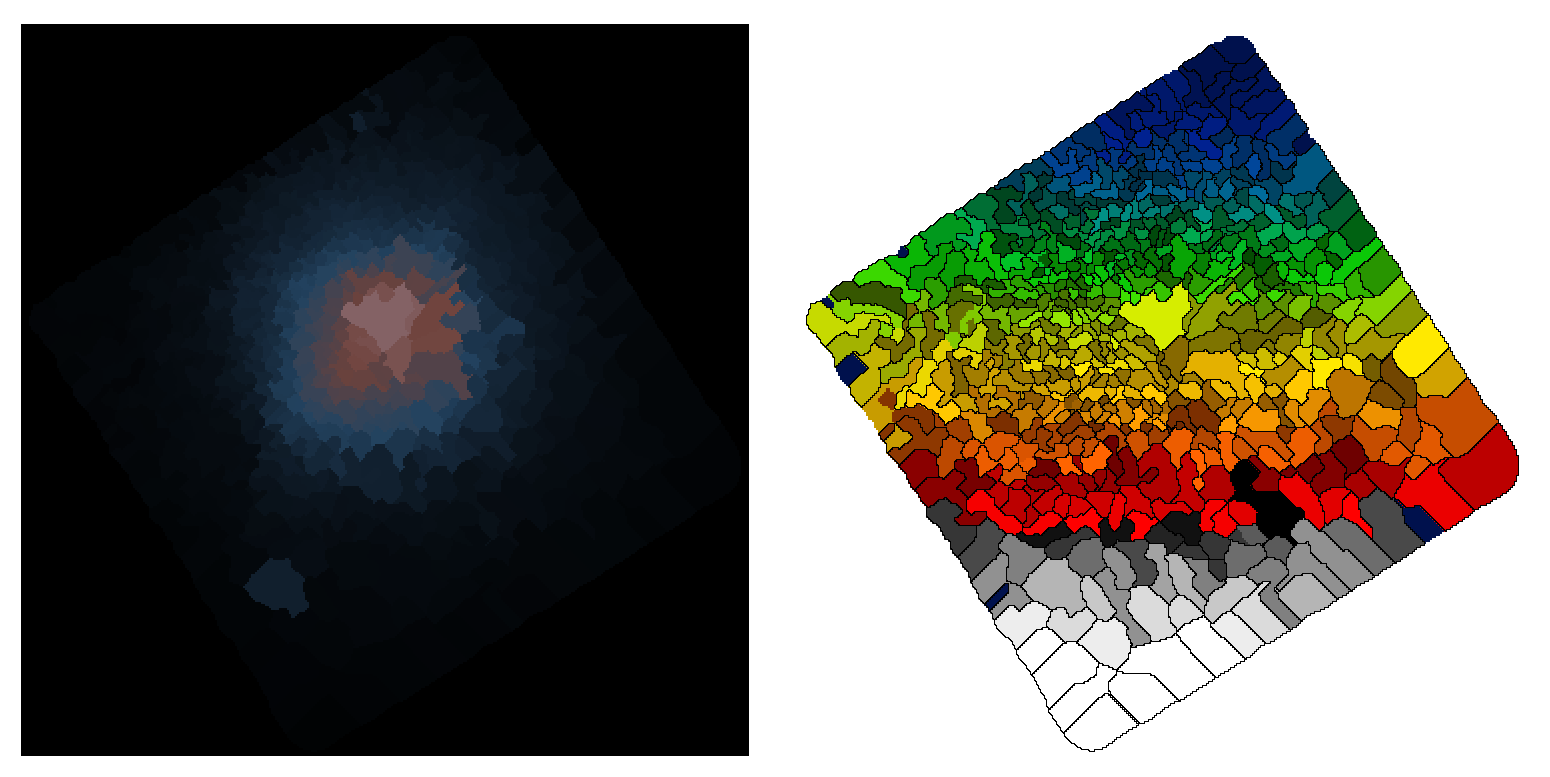

In [11]:
display_map pathfinder_min20px_min300cts.img pathfinder_min20px_min300cts.map pathfinder_min20px_min300cts.png pathfinder_min20px_min300cts.reg